In [ ]:
from google.colab import files
import os
import shutil

import pandas as pd
import numpy as np
# import datetime
from datetime import datetime

from IPython.display import display
#import matplotlib.pyplot as plt
#import seaborn as sns

!pip install matplotlib
from matplotlib import pyplot as plt
import matplotlib
!pip install japanize_matplotlib
import japanize_matplotlib
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

from scipy.stats import linregress
import seaborn as sns

!pip install scikit-learn
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

import re
import math

import statsmodels.api as sm


import shutil
import glob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c6d51ab4e9b9664ef4c6a7930194255e63ea8410638c1192b712561179c8a535
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib
Mounted at /content/drive


In [ ]:
drive.mount('/content/drive')
input_path = "/content/drive/MyDrive/Colab Notebooks/data/山野印刷/"
df1 = pd.read_csv(input_path+"df1.csv", encoding='cp932')
df2 = pd.read_csv(input_path+"df2.csv", encoding='cp932')
df3 = pd.read_csv(input_path+"df3.csv", encoding='cp932')
# df1_m = pd.read_csv(input_path+"df1_m.csv", encoding='cp932')
# df2_m = pd.read_csv(input_path+"df2_m.csv", encoding='cp932')
# df3_m = pd.read_csv(input_path+"df3_m.csv", encoding='cp932')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1["日付"] = pd.to_datetime(df1["日付"], format="%Y/%m/%d")
df2["日付"] = pd.to_datetime(df2["日付"], format="%Y/%m/%d")
df3["日付"] = pd.to_datetime(df3["日付"], format="%Y/%m/%d")

In [ ]:
df1["月日"] = df1["日付"].dt.strftime("%m/%d")
df2["月日"] = df2["日付"].dt.strftime("%m/%d")
# df3["月日"] = df3["日付"].dt.strftime("%m/%d")
df1["年月"] = df1["日付"].dt.strftime("%y/%m")
df2["年月"] = df2["日付"].dt.strftime("%y/%m")
df3["年月"] = df3["日付"].dt.strftime("%y/%m")
df1["月"] = df1["日付"].dt.strftime("%m")
df2["月"] = df2["日付"].dt.strftime("%m")
# df3["月"] = df3["日付"].dt.strftime("%m")

# **事前plot**

In [ ]:
input_path = "/content/drive/MyDrive/Colab Notebooks/data/山野印刷/"
df=pd.read_csv(input_path +"yamano_青果.csv",encoding="cp932")

In [ ]:
df

In [ ]:
df=df.dropna(how='all',axis=1)

df_turnover=df[df["表示項目"]=="売上金額"]
df_num=df[df["表示項目"]=="売上点数"]
df_turnover=df_turnover.drop(labels=["表示項目","合計"],axis=1).reset_index(drop=True)
df_num=df_num.drop(labels=["表示項目","合計"],axis=1).reset_index(drop=True)

In [ ]:
df_turnover.columns.tolist()[3:]

In [ ]:
df_merchandises_turnover=df_turnover.iloc[:,1:]
df_merchandises_num=df_num.iloc[:,1:]

In [ ]:
# x=df_turnover["期間"]
# y=df_merchandises_turnover
x=df_num["期間"]
y=df_merchandises_num

# カラーマップの選択
# cmap = get_cmap('tab20',40)
custom_colors = [
    (0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1),
    (1, 1, 0), (1, 0, 1), (0, 1, 1), (0.5, 0, 0),
    (0, 0.5, 0), (0, 0, 0.5), (0.5, 0.5, 0), (0.5, 0, 0.5),
    (0, 0.5, 0.5), (0.5, 0.25, 0), (0.5, 0, 0.25), (0.25, 0.5, 0),
    (0, 0.25, 0.5), (0.25, 0, 0.5), (0, 0.5, 0.25), (0.25, 0.25, 0),
    (0.25, 0, 0.25), (0, 0.25, 0.25), (0.75, 0.25, 0), (0.75, 0, 0.25),
    (0.25, 0.75, 0), (0, 0.75, 0.25), (0.25, 0.5, 0.5), (0.5, 0.25, 0.5),
    (0.5, 0.5, 0.25), (0.75, 0.75, 0), (0.75, 0, 0.75), (0, 0.75, 0.75),
    (0.5, 0.75, 0.25), (0.25, 0.75, 0.5), (0.5, 0.25, 0.75), (0.75, 0.5, 0.25)
]
custom_cmap = mcolors.ListedColormap(custom_colors)

plt.figure(figsize=(50, 20))
# 各データを描画
for i, col in enumerate(y.columns):
  plt.plot(x, y[col], marker='o', linestyle='-', color=custom_cmap(i), label=col)

# グラフにタイトルと軸ラベルを追加

plt.title('売上数量推移')
plt.xlabel('日付')
plt.xticks(rotation=90)
plt.ylabel('売上数量')

# 凡例の表示
plt.legend()

# グラフの表示
plt.show()

In [ ]:
# y[col]

**トマト**

In [ ]:
df_tomato=df.loc[:, df.columns.str.contains('トマト|期間|表示項目')]

In [ ]:
df_tomato

,期間,表示項目,02010201 国産トマト,02010202 産直トマト,02010203 中玉トマト
0,2021/04/01(木),売上金額,1630163,580623,152183
1,2021/04/01(木),売上点数,11052,1567,527
2,2021/04/02(金),売上金額,1539928,601840,149337
3,2021/04/02(金),売上点数,8978,1615,562
4,2021/04/03(土),売上金額,2216160,827561,235241
...,...,...,...,...,...
117,2021/05/29(土),売上点数,18377,1851,856
118,2021/05/30(日),売上金額,4123559,715473,235661
119,2021/05/30(日),売上点数,15521,1923,804
120,2021/05/31(月),売上金額,3234863,663332,162223


In [ ]:
df_tomato_num=df_tomato[df_tomato["表示項目"]=="売上点数"].reset_index(drop=True)
df_tomato_turnover=df_tomato[df_tomato["表示項目"]=="売上金額"].reset_index(drop=True)
df_tomato_num=df_tomato_num.drop(columns="表示項目")
df_tomato_turnover=df_tomato_turnover.drop(columns="表示項目")

In [ ]:
#折れ線三合一
#散布図：点数　価格

In [ ]:
df_tomato_num

,期間,02010201 国産トマト,02010202 産直トマト,02010203 中玉トマト
0,2021/04/01(木),11052,1567,527
1,2021/04/02(金),8978,1615,562
2,2021/04/03(土),9157,2207,820
3,2021/04/04(日),7194,2206,723
4,2021/04/05(月),12603,1384,573
...,...,...,...,...
56,2021/05/27(木),14507,791,333
57,2021/05/28(金),24872,1618,799
58,2021/05/29(土),18377,1851,856
59,2021/05/30(日),15521,1923,804


In [ ]:
df_tomato_price=df_tomato_turnover.iloc[:,2:]/df_tomato_num.iloc[:,2:]
df_tomato_price=pd.concat([df_tomato_num["期間"], df_tomato_price], axis=1)

In [ ]:
df_tomato_price

,期間,02010202 産直トマト,02010203 中玉トマト
0,2021/04/01(木),370.531589,288.772296
1,2021/04/02(金),372.656347,265.724199
2,2021/04/03(土),374.971001,286.879268
3,2021/04/04(日),375.944696,306.648686
4,2021/04/05(月),365.765896,277.762653
...,...,...,...
56,2021/05/27(木),364.074589,282.309309
57,2021/05/28(金),371.542027,278.939925
58,2021/05/29(土),375.039438,279.357477
59,2021/05/30(日),372.060842,293.110697


<ipython-input-21-2ffa21707073>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


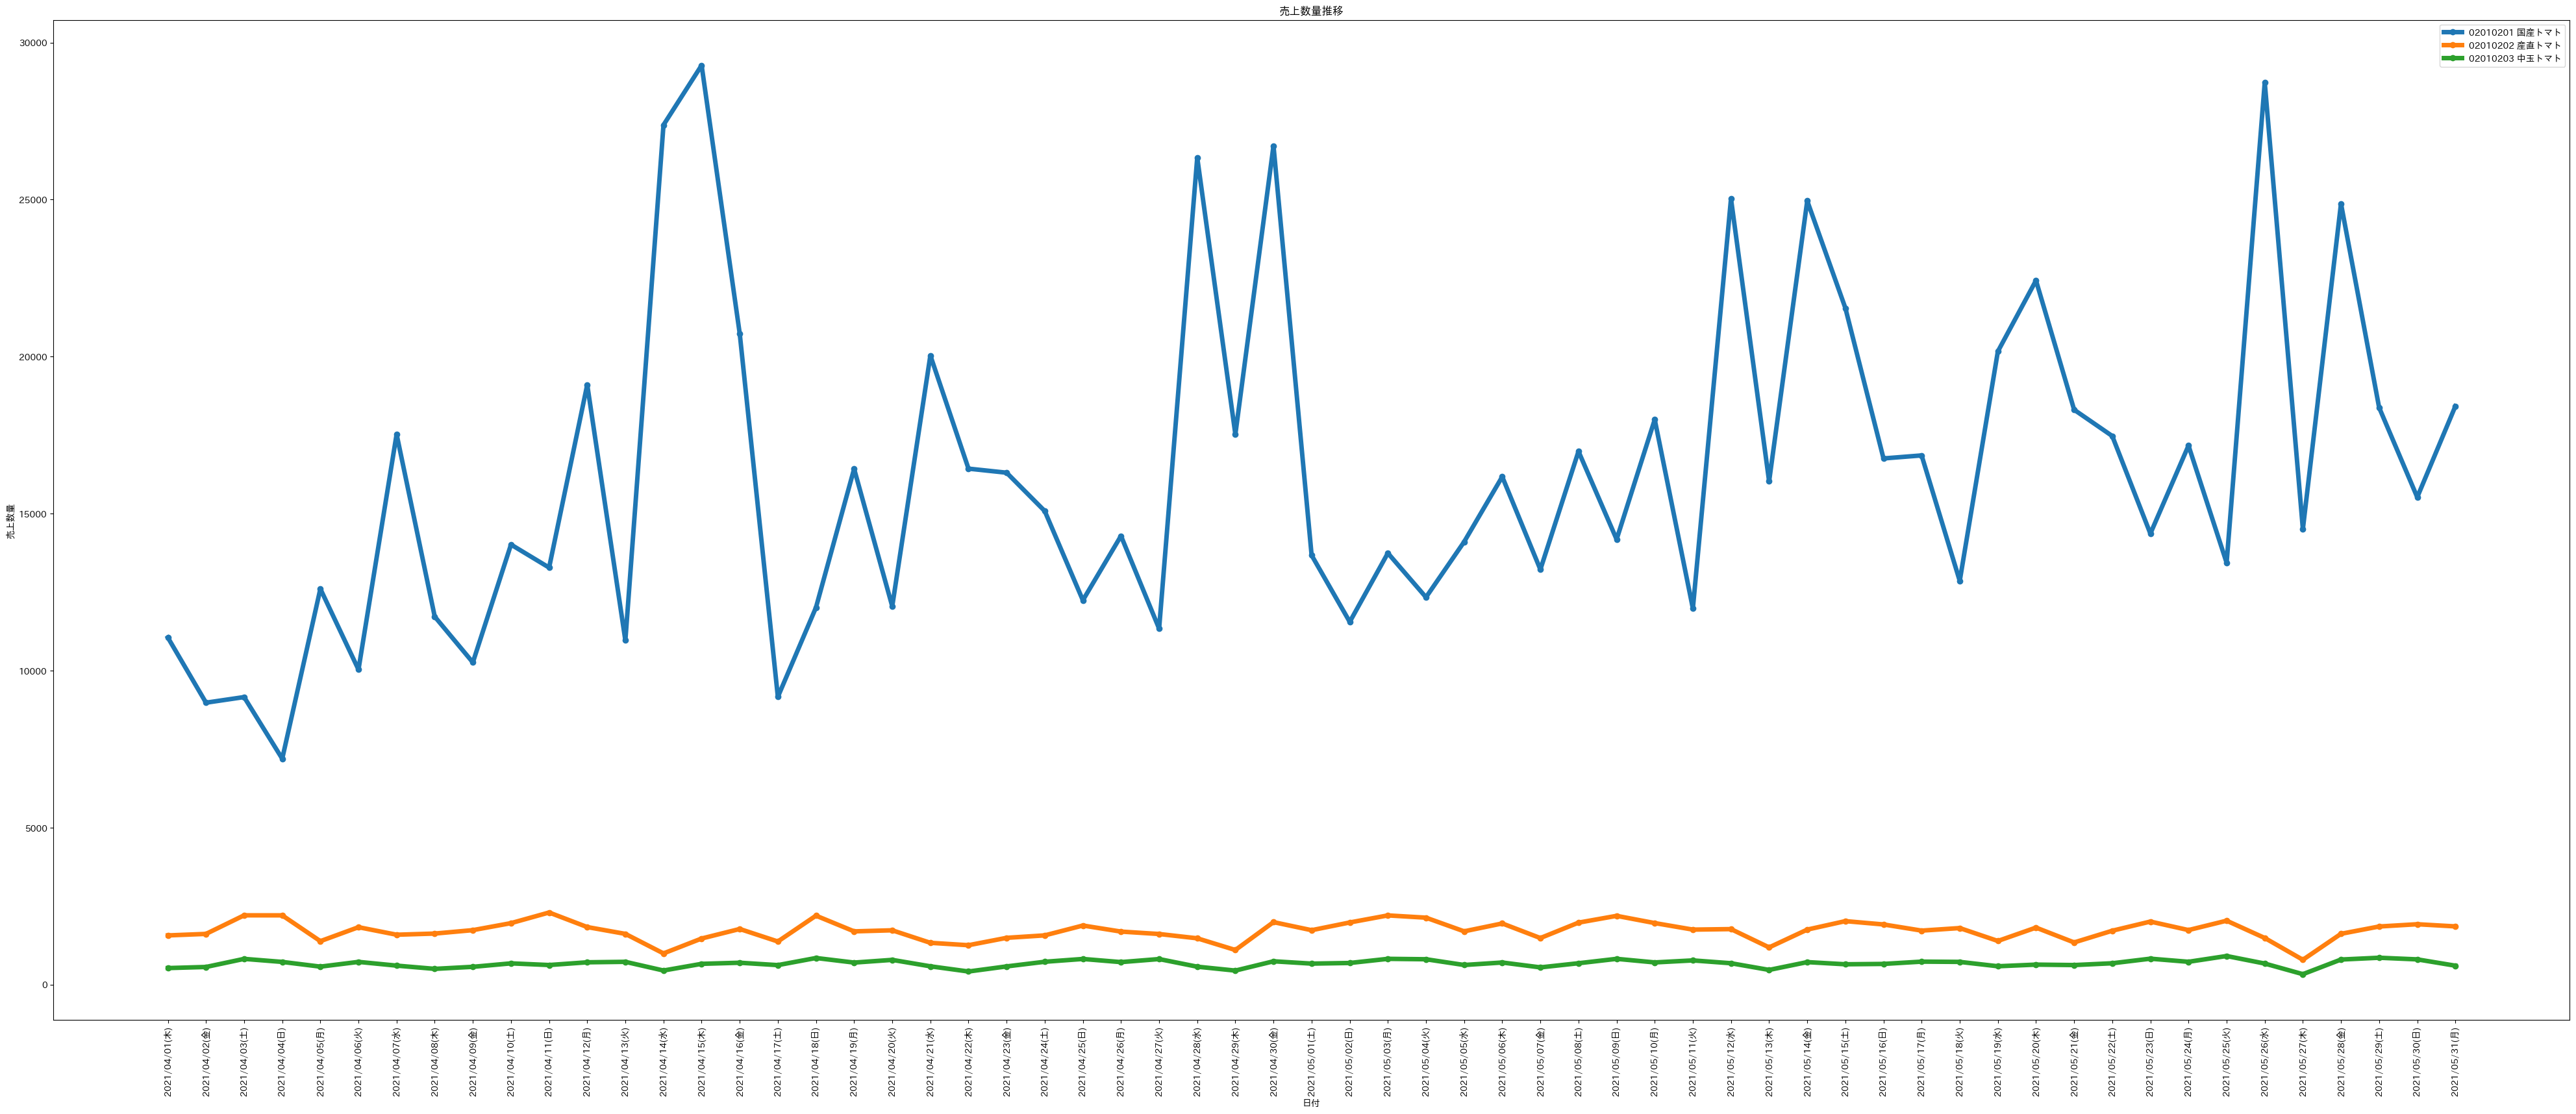

In [ ]:
#折れ線グラフ

# x=df_tomato_price["期間"]
# y=df_tomato_price
# x=df_tomato_turnover["期間"]
# y=df_tomato_turnover
x=df_tomato_num["期間"]
y=df_tomato_num

# カラーマップの選択
cmap = get_cmap('tab10')

plt.figure(figsize=(50, 20))
# 各データを描画
for i, col in enumerate(y.columns[1:]):
  plt.plot(x, y[col], marker='o', linestyle='-',color = cmap(i), label=col,linewidth=5)

# グラフにタイトルと軸ラベルを追加

plt.title('売上数量推移')
plt.xlabel('日付')
plt.xticks(rotation=90)
plt.ylabel('売上数量')

# 凡例の表示
plt.legend()

# グラフの表示
plt.show()

In [ ]:
y.columns[2:]
# 02010201 国産トマト	02010202 産直トマト	02010203 中玉トマト

Index(['02010200 トマト', '02010201 国産トマト', '02010202 産直トマト', '02010203 中玉トマト',
       '02010297 その他トマト'],
      dtype='object')

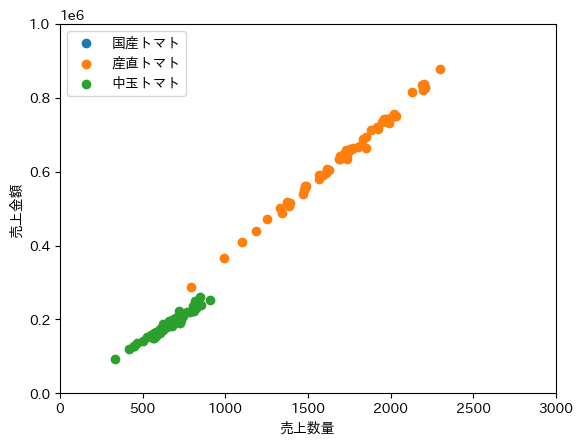

In [ ]:
# x=df_tomato_price["期間"]
# y=df_tomato_price
# x=df_tomato_turnover["期間"]
# y=df_tomato_turnover
# x=df_tomato_num["期間"]
# y=df_tomato_num
plt.scatter(df_tomato_num["02010201 国産トマト"], df_tomato_turnover["02010201 国産トマト"],label='国産トマト')
plt.scatter(df_tomato_num["02010202 産直トマト"], df_tomato_turnover["02010202 産直トマト"],label='産直トマト')
plt.scatter(df_tomato_num["02010203 中玉トマト"], df_tomato_turnover["02010203 中玉トマト"],label='中玉トマト')

# グラフにタイトルと軸ラベルを追加
# plt.title('散布図の例')
plt.xlabel('売上数量')
plt.ylabel('売上金額')
plt.xlim(0, 3000)
plt.ylim(0, 1000000)
plt.legend()

# グラフの表示
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# データ
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 12, 9]

# 折れ線グラフの描画
plt.plot(x, y, marker='o', linestyle='-')

# グラフにタイトルと軸ラベルを追加
plt.title('折れ線グラフの例')
plt.xlabel('X軸のラベル')
plt.ylabel('Y軸のラベル')

# グリッドの表示
plt.grid(True)

# グラフの表示
plt.show()


# **データ処理**

In [ ]:
drive.mount('/content/drive')
input_path = "/content/drive/MyDrive/Colab Notebooks/data/山野印刷/20231215/"
# input_path = "/content/drive/MyDrive/仕事/扶桑精工/"
csv_files = glob.glob(input_path+'*.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.DataFrame()
for i in range(len(csv_files)):
  df_r = pd.read_csv(csv_files[i], encoding='cp932', skiprows=6)
  # print(len(df_r))
  df=pd.concat([df,df_r],axis=0)

In [ ]:
df=df[df["期間"]!="合計"]
df=df.dropna(how="all",axis=1)
df=df.reset_index(drop=True)

In [ ]:
# 日付と曜日を分割する関数
def split_date_and_day(row):
    date_string = row["期間"]
    date_format = "%Y/%m/%d"
    date_part = datetime.strptime(date_string.split("(")[0], date_format).date()
    day_of_week = date_string.split("(")[1][0]
    return pd.Series({"Date": date_part, "Day": day_of_week})

# apply関数を使って各行に関数を適用し、結果を新しい列に追加
df[["日付", "曜日"]] = df.apply(split_date_and_day, axis=1)

In [ ]:
#点数
df1 = df[df["表示項目"]=="売上点数"]
df1=df1[["日付","合計","02010200 トマト", "02010201 国産トマト", "02010202 産直トマト", "02010203 中玉トマト", "02010297 その他トマト"]]
df1=df1.rename(columns={"合計":"合計点数"})
df1 = df1.fillna(0)
#金額
df2 = df[df["表示項目"]=="売上金額"]
df2=df2[["日付","合計","02010200 トマト", "02010201 国産トマト", "02010202 産直トマト", "02010203 中玉トマト", "02010297 その他トマト"]]
df2=df2.rename(columns={"合計":"合計金額"})
df2 = df2.fillna(0)
#客数
df3 = df[df["表示項目"]=="客数"]
df3 = df3[["日付","合計","曜日"]]
df3=df3.rename(columns={"合計":"客数"})
df3 = df3.fillna(0)

In [ ]:
# df1.to_csv('df1.csv',encoding="cp932",index = False)
# files.download('df1.csv')
# df2.to_csv('df2.csv',encoding="cp932",index = False)
# files.download('df2.csv')
# df3.to_csv('df3.csv',encoding="cp932",index = False)
# files.download('df3.csv')

In [ ]:
input_path1 = "/content/drive/MyDrive/Colab Notebooks/data/山野印刷/20231215/weather/"
df_weather1 = pd.read_csv(input_path1+"weather1.csv", encoding='cp932', skiprows=3)
df_weather2 = pd.read_csv(input_path1+"weather2.csv", encoding='cp932', skiprows=3)
df_weather3 = pd.read_csv(input_path1+"weather3.csv", encoding='cp932', skiprows=3)

df_weather=pd.concat([df_weather1,df_weather2,df_weather3],axis=0)

df_weather

In [ ]:
df1_m=pd.DataFrame(columns=df1.columns,index=range(len(df1["年月"].drop_duplicates().tolist())))
df1_m["年月"]=df1["年月"].drop_duplicates().tolist()

In [ ]:
df2_m=pd.DataFrame(columns=df2.columns,index=range(len(df2["年月"].drop_duplicates().tolist())))
df2_m["年月"]=df2["年月"].drop_duplicates().tolist()

In [ ]:
df3['合計点数/客数']=df1["合計点数"]/df3["客数"]

In [ ]:
df3_m=pd.DataFrame(columns=df3.columns,index=range(len(df3["年月"].drop_duplicates().tolist())))
df3_m["年月"]=df3["年月"].drop_duplicates().tolist()

In [ ]:
for i in df1["年月"].drop_duplicates().tolist():
  df1_m.loc[df1_m["年月"]==i, "合計点数_sum"]=df1[df1["年月"]==i]["合計点数"].sum()
  df1_m.loc[df1_m["年月"]==i, "02010201 国産トマト_sum"]=df1[df1["年月"]==i]["02010201 国産トマト"].sum()
  df1_m.loc[df1_m["年月"]==i, "02010202 産直トマト_sum"]=df1[df1["年月"]==i]["02010202 産直トマト"].sum()
  df1_m.loc[df1_m["年月"]==i, "02010203 中玉トマト_sum"]=df1[df1["年月"]==i]["02010203 中玉トマト"].sum()

  df1_m.loc[df1_m["年月"]==i, "合計点数_mean"]=df1[df1["年月"]==i]["合計点数"].mean()
  df1_m.loc[df1_m["年月"]==i, "02010201 国産トマト_mean"]=df1[df1["年月"]==i]["02010201 国産トマト"].mean()
  df1_m.loc[df1_m["年月"]==i, "02010202 産直トマト_mean"]=df1[df1["年月"]==i]["02010202 産直トマト"].mean()
  df1_m.loc[df1_m["年月"]==i, "02010203 中玉トマト_mean"]=df1[df1["年月"]==i]["02010203 中玉トマト"].mean()

In [ ]:
for i in df2["年月"].drop_duplicates().tolist():
  df2_m.loc[df2_m["年月"]==i, "合計金額_sum"]=df2[df2["年月"]==i]["合計金額"].sum()
  df2_m.loc[df2_m["年月"]==i, "02010201 国産トマト_sum"]=df2[df2["年月"]==i]["02010201 国産トマト"].sum()
  df2_m.loc[df2_m["年月"]==i, "02010202 産直トマト_sum"]=df2[df2["年月"]==i]["02010202 産直トマト"].sum()
  df2_m.loc[df2_m["年月"]==i, "02010203 中玉トマト_sum"]=df2[df2["年月"]==i]["02010203 中玉トマト"].sum()

  df2_m.loc[df2_m["年月"]==i, "合計金額_mean"]=df2[df2["年月"]==i]["合計金額"].mean()
  df2_m.loc[df2_m["年月"]==i, "02010201 国産トマト_mean"]=df2[df2["年月"]==i]["02010201 国産トマト"].mean()
  df2_m.loc[df2_m["年月"]==i, "02010202 産直トマト_mean"]=df2[df2["年月"]==i]["02010202 産直トマト"].mean()
  df2_m.loc[df2_m["年月"]==i, "02010203 中玉トマト_mean"]=df2[df2["年月"]==i]["02010203 中玉トマト"].mean()

In [ ]:
df3["合計点数/客数"]=df1["年月"]
for i in df3["年月"].drop_duplicates().tolist():
  df3_m.loc[df3_m["年月"]==i, "客数_sum"]=df3[df3["年月"]==i]["客数"].sum()
  df3_m.loc[df3_m["年月"]==i, "合計点数/客数_sum"]=df3[df3["年月"]==i]["合計点数/客数"].sum()

  df3_m.loc[df3_m["年月"]==i, "客数_mean"]=df3[df3["年月"]==i]["客数"].mean()
  # df3_m.loc[df3_m["年月"]==i, "合計点数/客数_mean"]=df3[df3["年月"]==i]["合計点数/客数"].mean()

In [ ]:
df1_m["月"]=pd.to_datetime(df1_m['年月'], format='%y/%m').dt.strftime("%m")
df1_m["日付"]=pd.to_datetime(df1_m['年月'], format='%y/%m')

In [ ]:
df2_m["月"]=pd.to_datetime(df2_m['年月'], format='%y/%m').dt.strftime("%m")
df2_m["日付"]=pd.to_datetime(df2_m['年月'], format='%y/%m')

In [ ]:
df3_m["月"]=pd.to_datetime(df3_m['年月'], format='%y/%m').dt.strftime("%m")
df3_m["日付"]=pd.to_datetime(df3_m['年月'], format='%y/%m')

In [ ]:
df1_m.to_csv('df1_m.csv',encoding="cp932",index = False)
files.download('df1_m.csv')
df2_m.to_csv('df2_m.csv',encoding="cp932",index = False)
files.download('df2_m.csv')
df3_m.to_csv('df3_m.csv',encoding="cp932",index = False)
files.download('df3_m.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **plot**

In [ ]:
# 点数
df_plot=pd.merge(df1,df3,on="日付")
df_plot["合計点数/客数"]=df_plot["合計点数"]/df_plot["客数"]

In [ ]:
# # 金額
# df_plot=pd.merge(df2,df3,on="日付")

**折れ線グラフ**

In [ ]:
# df_plot=df1
# df_plot=df2
# df_plot=df3

merchandise="合計金額"
# merchandise="合計点数"
# merchandise="02010201 国産トマト"
# merchandise="02010202 産直トマト"
# merchandise="02010203 中玉トマト"
# merchandise="客数"
# merchandise="合計点数/客数"

# label="点数"
label="金額"
# label="客数"
# label="合計点数/客数"


#---------------年ごとplot-----------------
# df_plot0 = df_plot[df_plot["日付"].dt.year == 2020]
# df_plot1 = df_plot[df_plot["日付"].dt.year == 2021]
# df_plot2 = df_plot[df_plot["日付"].dt.year == 2022]
# df_plot3 = df_plot[df_plot["日付"].dt.year == 2023]

# # 期間全体のDataFrameを作成
# full_df = pd.DataFrame({"日付": pd.date_range(start="2020/01/01", end="2020/12/31")})
# # もとのデータと結合（マージ）して、NaNを補完
# df_plot0 = pd.merge(full_df, df_plot0, on="日付", how="left")
# df_plot0["月日"] = df_plot0["日付"].dt.strftime("%m/%d")

# df_plot0 = df_plot0.sort_values(by="月日")
# df_plot1 = df_plot1.sort_values(by="月日")
# df_plot2 = df_plot2.sort_values(by="月日")
# df_plot3 = df_plot3.sort_values(by="月日")

#---------------12月~翌年11月plot-----------------
df_plot0 = df_plot[(df_plot['日付'] >= '2020-12-01') & (df_plot['日付'] <= '2021-11-30')]
df_plot1 = df_plot[(df_plot['日付'] >= '2021-12-01') & (df_plot['日付'] <= '2022-11-30')]
df_plot2 = df_plot[(df_plot['日付'] >= '2022-12-01') & (df_plot['日付'] <= '2023-11-30')]

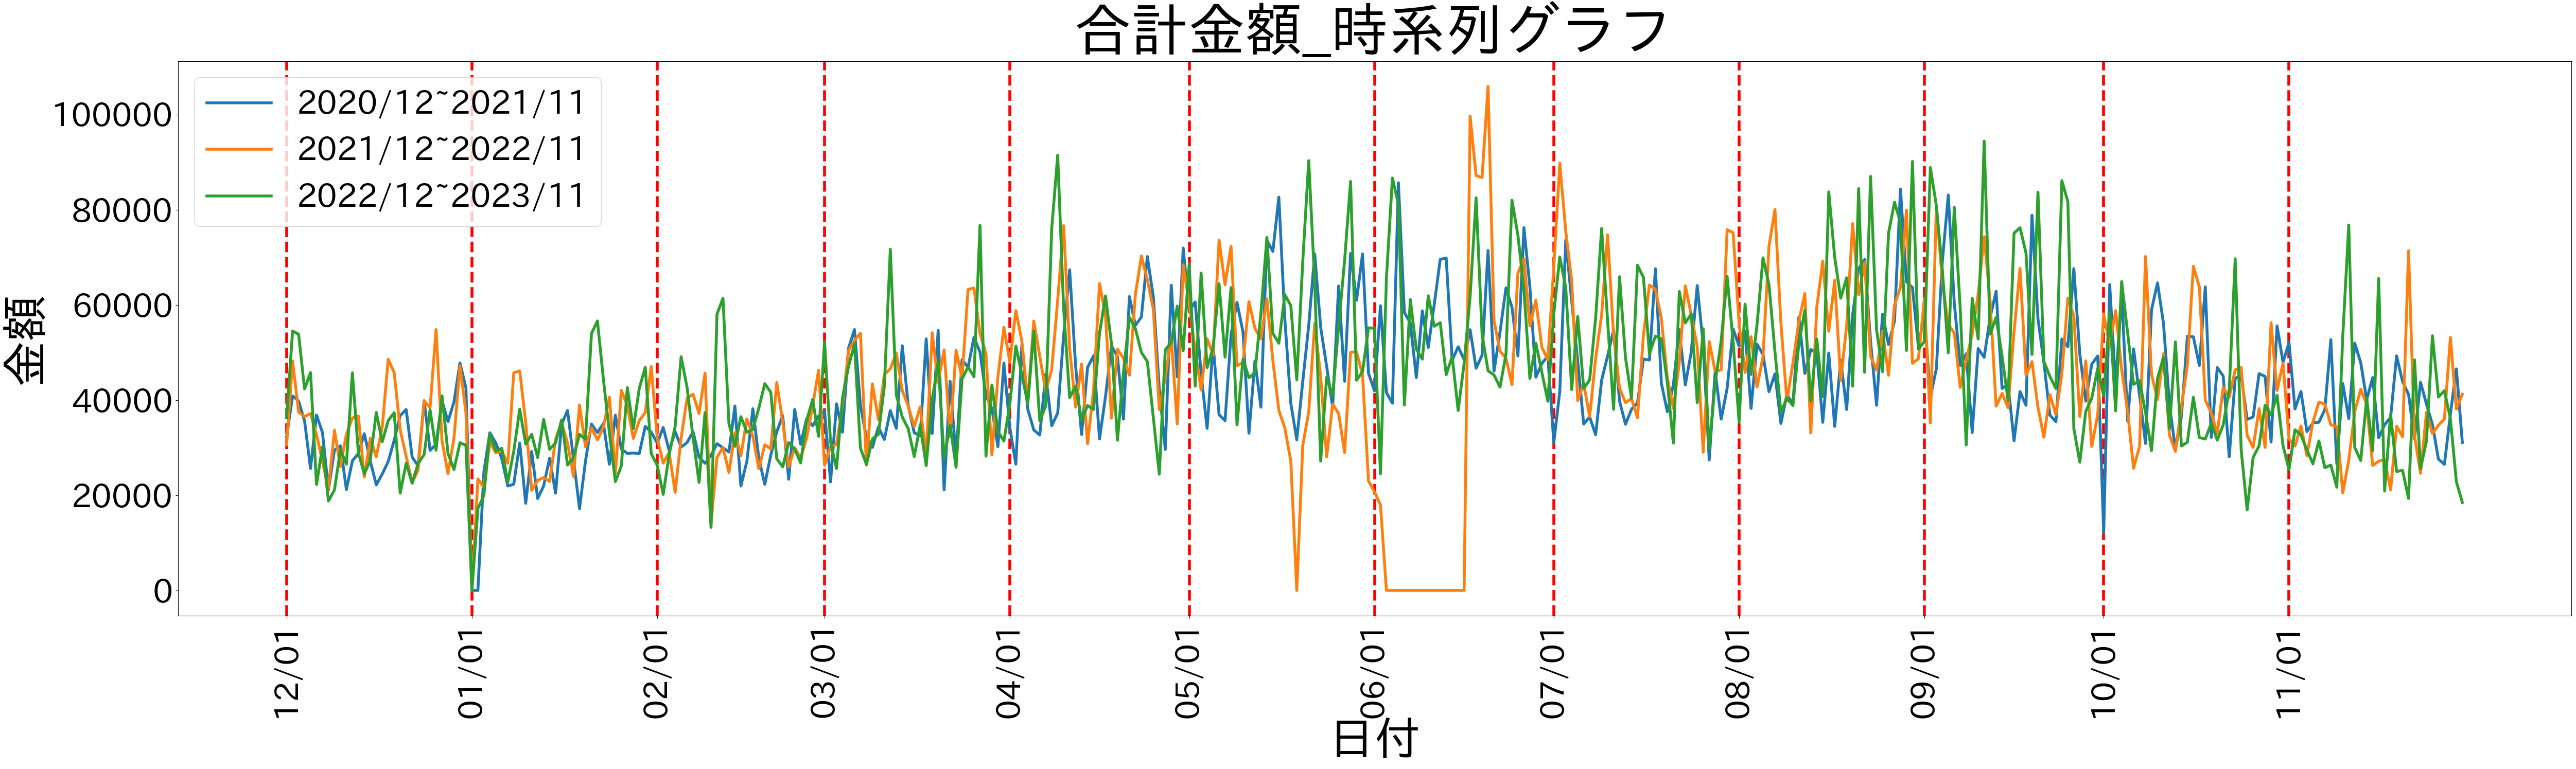

In [ ]:
# グラフの描画
# plt.figure(figsize=(60, 20))
plt.figure(figsize=(60, 14))

# 折れ線グラフを描く
plt.plot(df_plot0["月日"], df_plot0[merchandise], label="2020/12~2021/11",linewidth=4)
plt.plot(df_plot1["月日"], df_plot1[merchandise], label="2021/12~2022/11",linewidth=4)
plt.plot(df_plot2["月日"], df_plot2[merchandise], label="2022/12~2023/11",linewidth=4)
# plt.plot(df_plot3["月日"], df_plot3[merchandise], label="2023")

# グラフにタイトルと軸ラベルを追加
# plt.title(merchandise+"_"+label,fontdict={'fontsize': 50, 'fontweight': 'bold'})
plt.title(merchandise+"_時系列グラフ",fontdict={'fontsize': 80, 'fontweight': 'bold'})

plt.xlabel("日付", fontdict={'fontsize': 65})
# plt.xticks(rotation='vertical')
# specified_ticks = [df_plot0["月日"].iloc[0], df_plot0["月日"].iloc[31], df_plot0["月日"].iloc[62]]
specified_ticks = ["12/01","01/01","02/01","03/01","04/01","05/01","06/01","07/01","08/01","09/01","10/01","11/01"]
plt.xticks(specified_ticks,rotation='vertical',fontsize=45)
plt.grid(axis='x', linestyle='--', alpha=1, color='red',linewidth=4)

plt.ylabel(label,fontdict={'fontsize': 65})
plt.yticks(fontsize=45)

plt.legend(fontsize=45)

**折れ線plot_all**

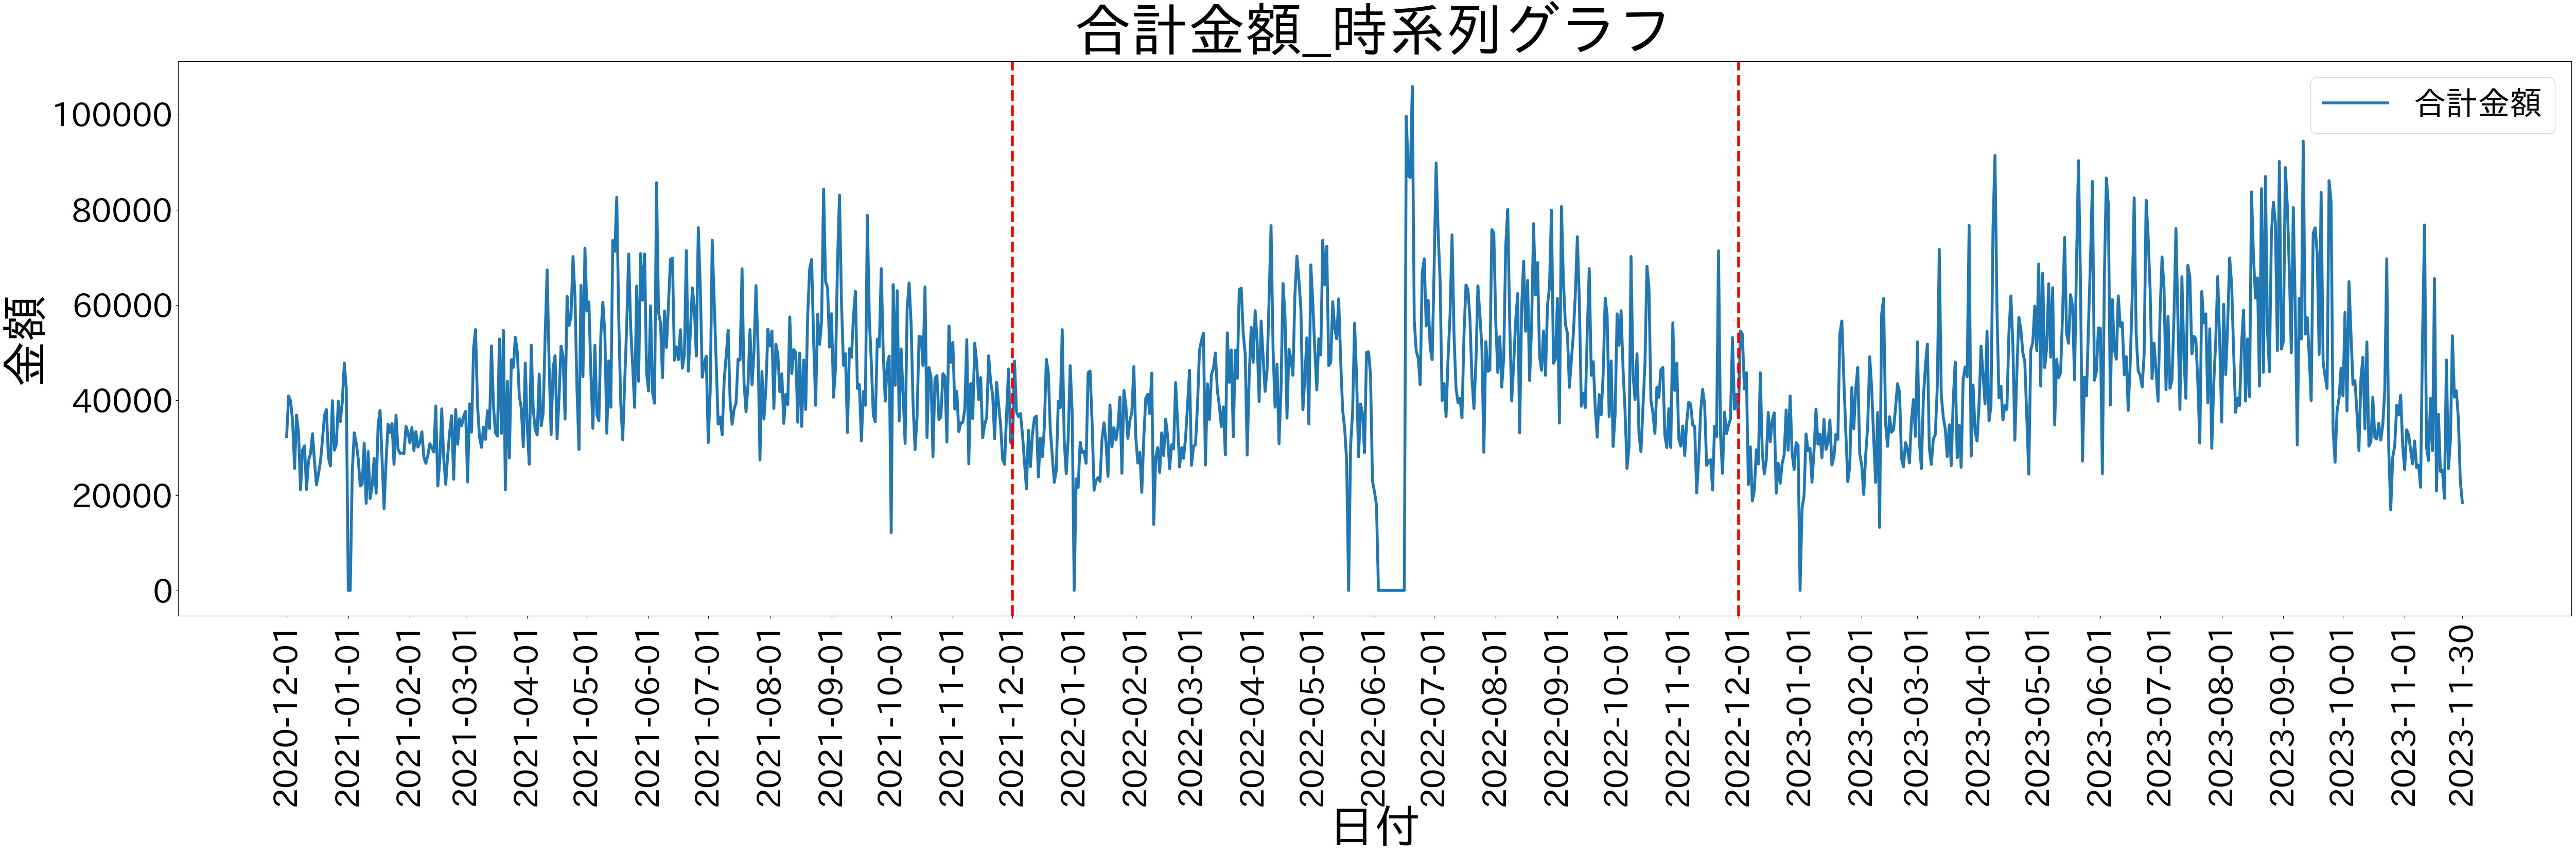

In [ ]:
merchandise="合計金額"
# merchandise="合計点数"
# merchandise="02010201 国産トマト"
# merchandise="02010202 産直トマト"
# merchandise="02010203 中玉トマト"
# merchandise="客数"
# merchandise="合計点数/客数"

label="金額"
# label="点数"
# label="客数"
# label="合計点数/客数"

# グラフの描画
# plt.figure(figsize=(60, 20))#plot_all
plt.figure(figsize=(60, 14))

# 折れ線グラフを描く
plt.plot(df_plot["日付"], df_plot[merchandise],label=merchandise,linewidth=4)

# グラフにタイトルと軸ラベルを追加
# plt.title(merchandise+"_"+label,fontdict={'fontsize': 50, 'fontweight': 'bold'})
plt.title(merchandise+"_時系列グラフ",fontdict={'fontsize': 80, 'fontweight': 'bold'})

plt.xlabel("日付", fontdict={'fontsize': 65})
# plt.xticks(rotation='vertical')
# specified_ticks = [df_plot0["月日"].iloc[0], df_plot0["月日"].iloc[31], df_plot0["月日"].iloc[62]]
specified_ticks = [pd.to_datetime('2020-12-01',format="%Y-%m-%d"),pd.to_datetime('2021-01-01',format="%Y-%m-%d"),pd.to_datetime('2021-02-01',format="%Y-%m-%d"),pd.to_datetime('2021-03-01',format="%Y-%m-%d"),
                   pd.to_datetime('2021-04-01',format="%Y-%m-%d"),pd.to_datetime('2021-05-01',format="%Y-%m-%d"),pd.to_datetime('2021-06-01',format="%Y-%m-%d"),pd.to_datetime('2021-07-01',format="%Y-%m-%d"),
                   pd.to_datetime('2021-08-01',format="%Y-%m-%d"),pd.to_datetime('2021-09-01',format="%Y-%m-%d"),pd.to_datetime('2021-10-01',format="%Y-%m-%d"),pd.to_datetime('2021-11-01',format="%Y-%m-%d"),
                   pd.to_datetime('2021-12-01',format="%Y-%m-%d"),pd.to_datetime('2022-01-01',format="%Y-%m-%d"),pd.to_datetime('2022-02-01',format="%Y-%m-%d"),pd.to_datetime('2022-03-01',format="%Y-%m-%d"),
                   pd.to_datetime('2022-04-01',format="%Y-%m-%d"),pd.to_datetime('2022-05-01',format="%Y-%m-%d"),pd.to_datetime('2022-06-01',format="%Y-%m-%d"),pd.to_datetime('2022-07-01',format="%Y-%m-%d"),
                   pd.to_datetime('2022-08-01',format="%Y-%m-%d"),pd.to_datetime('2022-09-01',format="%Y-%m-%d"),pd.to_datetime('2022-10-01',format="%Y-%m-%d"),pd.to_datetime('2022-11-01',format="%Y-%m-%d"),
                   pd.to_datetime('2022-12-01',format="%Y-%m-%d"),pd.to_datetime('2023-01-01',format="%Y-%m-%d"),pd.to_datetime('2023-02-01',format="%Y-%m-%d"),pd.to_datetime('2023-03-01',format="%Y-%m-%d"),
                   pd.to_datetime('2023-04-01',format="%Y-%m-%d"),pd.to_datetime('2023-05-01',format="%Y-%m-%d"),pd.to_datetime('2023-06-01',format="%Y-%m-%d"),pd.to_datetime('2023-07-01',format="%Y-%m-%d"),
                   pd.to_datetime('2023-08-01',format="%Y-%m-%d"),pd.to_datetime('2023-09-01',format="%Y-%m-%d"),pd.to_datetime('2023-10-01',format="%Y-%m-%d"),pd.to_datetime('2023-11-01',format="%Y-%m-%d"),
                   pd.to_datetime('2023-11-30',format="%Y-%m-%d")]
plt.xticks(specified_ticks,rotation='vertical',fontsize=45)

plt.axvline(x=specified_ticks[12], color='red', linestyle='--', linewidth=4)
plt.axvline(x=specified_ticks[24], color='red', linestyle='--', linewidth=4)

plt.ylabel(label,fontdict={'fontsize': 65})
plt.yticks(fontsize=45)

plt.legend(fontsize=45)

**箱ひげ図-曜日**

In [ ]:
df_plot

,日付,合計点数,02010200 トマト,02010201 国産トマト,02010202 産直トマト,02010203 中玉トマト,02010297 その他トマト,月日,年月_x,月,客数,曜日,年月_y,合計点数/客数
0,2020-12-01,101,0,46,49,6,0,12/01,20/12,12,2675,火,20/12,20/12
1,2020-12-02,326,0,299,24,3,0,12/02,20/12,12,2632,水,20/12,20/12
2,2020-12-03,329,0,303,24,2,0,12/03,20/12,12,2776,木,20/12,20/12
3,2020-12-04,230,0,209,15,6,0,12/04,20/12,12,2780,金,20/12,20/12
4,2020-12-05,86,0,66,20,0,0,12/05,20/12,12,2781,土,20/12,20/12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-11-26,109,0,59,40,10,0,11/26,23/11,11,3160,日,23/11,23/11
1091,2023-11-27,139,0,102,33,4,0,11/27,23/11,11,3333,月,23/11,23/11
1092,2023-11-28,264,0,243,17,4,0,11/28,23/11,11,2796,火,23/11,23/11
1093,2023-11-29,79,0,50,24,5,0,11/29,23/11,11,2968,水,23/11,23/11


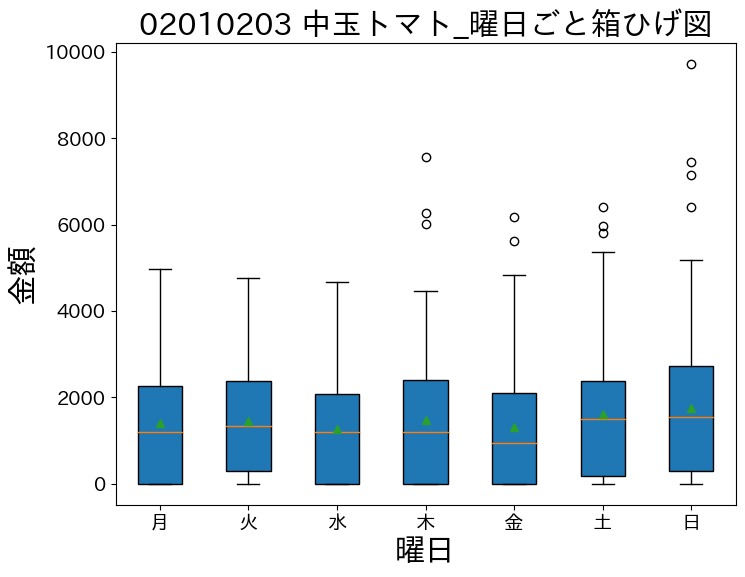

In [ ]:
# 点数
# df_plot=pd.merge(df1, df3, on='日付')
# 金額
df_plot=pd.merge(df2, df3, on='日付')

# merchandise="合計点数"
# merchandise="合計金額"
# merchandise="02010201 国産トマト"
# merchandise="02010202 産直トマト"
merchandise="02010203 中玉トマト"

# label="点数"
label="金額"

# merchandise="客数"
# label="客数"

# 箱ひげ図の描画
plt.figure(figsize=(8, 6))
plt.boxplot([df_plot[df_plot["曜日"] == day][merchandise] for day in ["月", "火", "水", "木", "金","土","日"]],
            vert=True, patch_artist=True, labels=["月", "火", "水", "木", "金","土","日"],showmeans=True)



# グラフにタイトルと軸ラベルを追加
plt.title(merchandise+"_曜日ごと箱ひげ図",fontsize=22)
plt.xlabel('曜日',fontsize=22)
plt.xticks(fontsize=14)
plt.ylabel(label,fontdict={'fontsize': 22})
plt.yticks(fontsize=14)

# plt.legend()
# グラフを表示
plt.show()


In [ ]:
data=[df_plot[df_plot["曜日"] == day][merchandise] for day in ["月", "火", "水", "木", "金","土","日"]]

means = [np.mean(d) for d in data]
medians = [np.median(d) for d in data]
q1 = [np.percentile(d, 25) for d in data]
q3 = [np.percentile(d, 75) for d in data]
whiskers_min = [np.min(d[d >= q1[i] - 1.5 * (q3[i] - q1[i])]) for i, d in enumerate(data)]
whiskers_max = [np.max(d[d <= q3[i] + 1.5 * (q3[i] - q1[i])]) for i, d in enumerate(data)]

# DataFrameを作成
df_statistics = pd.DataFrame({
    "平均値": means,
    "中央値": medians,
    "Q1": q1,
    "Q3": q3,
    "whiskers_min": whiskers_min,
    "whiskers_max": whiskers_max
}, index=["月", "火", "水", "木", "金", "土", "日"])
df_transposed = df_statistics.transpose()

In [ ]:
df_transposed

,月,火,水,木,金,土,日
平均値,1410.25,1448.369427,1264.050955,1470.815287,1308.698718,1611.929487,1760.801282
中央値,1192.00,1345.000000,1192.000000,1196.000000,946.000000,1490.000000,1543.500000
Q1,0.00,299.000000,0.000000,0.000000,0.000000,186.500000,298.000000
Q3,2265.00,2384.000000,2086.000000,2392.000000,2091.250000,2384.000000,2728.250000
whiskers_min,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
whiskers_max,4976.00,4768.000000,4674.000000,4470.000000,4838.000000,5372.000000,5172.000000


**折れ線グラフ-月単位合計plot**

In [ ]:
# # 点数
# df_plot=pd.merge(df1_m,df3_m,on="日付")

In [ ]:
# 金額
df_plot=pd.merge(df2_m,df3_m,on="日付")

Text(0, 0.5, '客数')

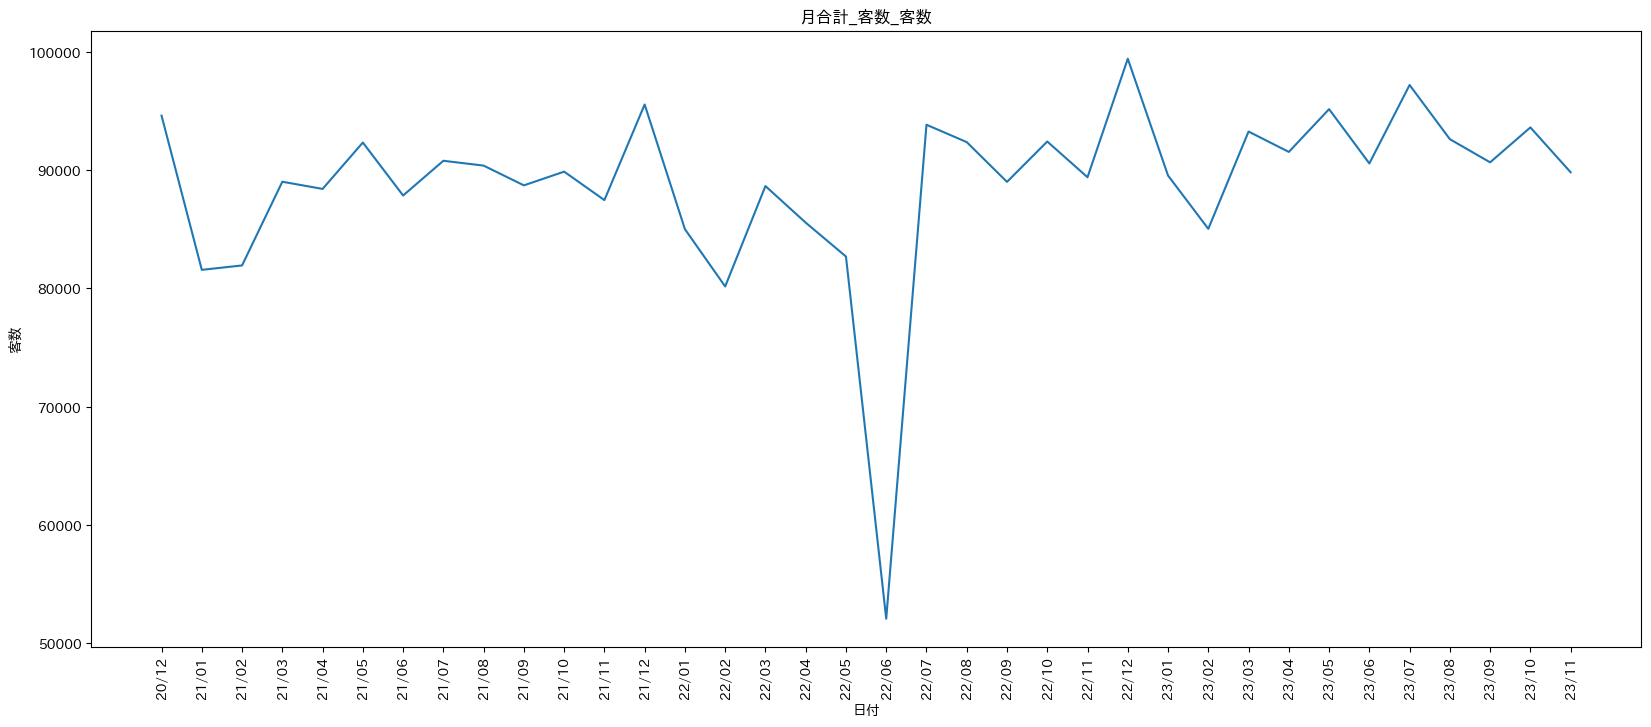

In [ ]:
# merchandise="合計金額"
# merchandise="合計点数"
# merchandise="02010201 国産トマト"
# merchandise="02010202 産直トマト"
# merchandise="02010203 中玉トマト"
merchandise="客数"

# label="金額"
# label="点数"
label="客数"

# グラフの描画
plt.figure(figsize=(20, 8))

# 折れ線グラフを描く
plt.plot(df_plot["年月_x"], df_plot[merchandise])

# グラフにタイトルと軸ラベルを追加
plt.title("月合計_"+merchandise+"_"+label)
plt.xlabel("日付")
plt.xticks(rotation='vertical')
plt.ylabel(label)

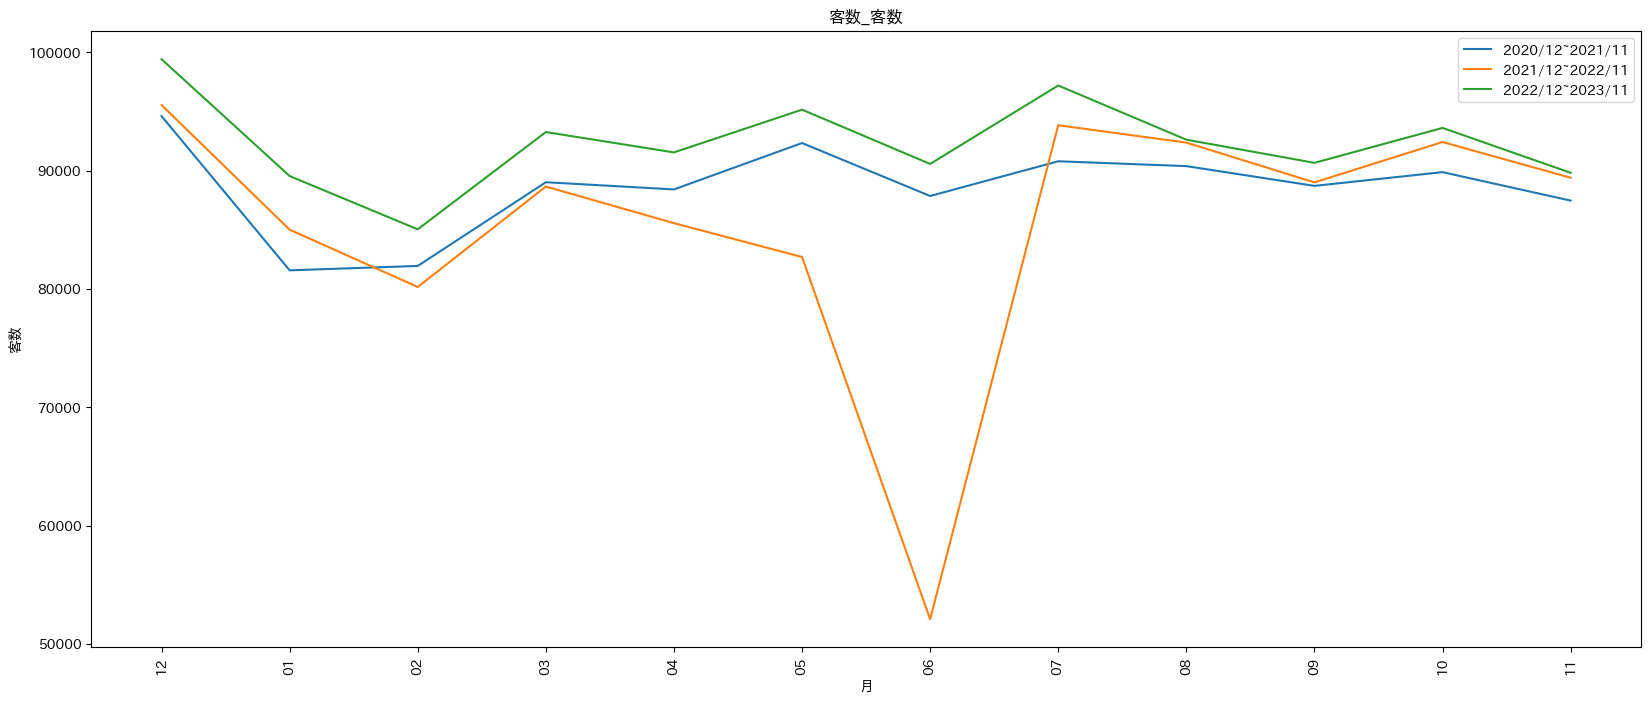

In [ ]:
df_plot0 = df_plot[(df_plot['日付'] >= '2020-12-01') & (df_plot['日付'] <= '2021-11-30')]
df_plot1 = df_plot[(df_plot['日付'] >= '2021-12-01') & (df_plot['日付'] <= '2022-11-30')]
df_plot2 = df_plot[(df_plot['日付'] >= '2022-12-01') & (df_plot['日付'] <= '2023-11-30')]

# グラフの描画
plt.figure(figsize=(60, 20))

# 折れ線グラフを描く
plt.plot(df_plot0["月_x"], df_plot0[merchandise], label="2020/12~2021/11")
plt.plot(df_plot1["月_x"], df_plot1[merchandise], label="2021/12~2022/11")
plt.plot(df_plot2["月_x"], df_plot2[merchandise], label="2022/12~2023/11")
# plt.plot(df_plot3["月日"], df_plot3[merchandise], label="2023")

# グラフにタイトルと軸ラベルを追加
plt.title(merchandise+"_"+label)
plt.xlabel("月")
plt.xticks(rotation='vertical')
plt.ylabel(label)
# plt.ylim(0,1500)
# plt.legend(labels=["2020", "2021","2022","2023"])
plt.legend()

In [ ]:
df_plot

,日付,合計点数,02010200 トマト,02010201 国産トマト,02010202 産直トマト,02010203 中玉トマト,02010297 その他トマト,月日,年月_x,月,客数,曜日,年月_y,合計点数/客数
0,2020-12-01,101,0,46,49,6,0,12/01,20/12,12,2675,火,20/12,0.037757
1,2020-12-02,326,0,299,24,3,0,12/02,20/12,12,2632,水,20/12,0.123860
2,2020-12-03,329,0,303,24,2,0,12/03,20/12,12,2776,木,20/12,0.118516
3,2020-12-04,230,0,209,15,6,0,12/04,20/12,12,2780,金,20/12,0.082734
4,2020-12-05,86,0,66,20,0,0,12/05,20/12,12,2781,土,20/12,0.030924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-11-26,109,0,59,40,10,0,11/26,23/11,11,3160,日,23/11,0.034494
1091,2023-11-27,139,0,102,33,4,0,11/27,23/11,11,3333,月,23/11,0.041704
1092,2023-11-28,264,0,243,17,4,0,11/28,23/11,11,2796,火,23/11,0.094421
1093,2023-11-29,79,0,50,24,5,0,11/29,23/11,11,2968,水,23/11,0.026617
